# Forecast next 30 days daily

In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [2]:
path = r'raw data - measurements'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, sep=';',decimal=",",
                      names=["DeviceID", "MeasurementID", "date_time", "energy_consumed","temperature", "wind_velocity", "air_humidity", "cloudiness", "day_length", "day_type", "season"])
    li.append(df)

raw_measurements = pd.concat(li, axis=0, ignore_index=True)



raw_measurements

,DeviceID,MeasurementID,date_time,energy_consumed,temperature,wind_velocity,air_humidity,cloudiness,day_length,day_type,season
0,5004,1.0,2015.09.01 00:00:00,0.000,0.000,0.0,0.0,0.0,13.750,1.0,3.0
1,5004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5004,2.0,2015.09.01 01:00:00,0.000,0.000,0.0,0.0,0.0,13.750,1.0,3.0
3,5004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5004,3.0,2015.09.01 02:00:00,0.000,0.000,0.0,0.0,0.0,13.750,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
6803740,5143,30646.0,2019.02.28 21:00:00,19.131,2.764,0.0,0.0,0.0,10.683,1.0,4.0
6803741,5143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6803742,5143,30647.0,2019.02.28 22:00:00,19.363,1.958,0.0,0.0,0.0,10.683,1.0,4.0
6803743,5143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#load device_types file
device_types = pd.read_csv('raw data - device type mapping/device-types.csv')

#extract device_type 
device_types['device_type'] = device_types['DeviceCode'].str[-2:]
device_types = device_types.drop(['DeviceCode'], axis=1)
device_types

,DeviceID,device_type
0,5001,CO
1,5002,CO
2,5003,CO
3,5004,CO
4,5005,CW
...,...,...
143,5144,CO
144,5145,CO
145,5146,CO
146,5147,CO


## Transform raw measurements

In [5]:
# drop duplicate, empty rows and reset index
df = raw_measurements.dropna(subset = ['MeasurementID']).reset_index(drop=True)

# format date_time
df['date_time'] = pd.to_datetime(df['date_time'], format='%Y.%m.%d %H:%M:%S')

# merge device types
df = df.merge(device_types, how='left', on='DeviceID')

df

,DeviceID,MeasurementID,date_time,energy_consumed,temperature,wind_velocity,air_humidity,cloudiness,day_length,day_type,season,device_type
0,5004,1.0,2015-09-01 00:00:00,0.000,0.000,0.0,0.0,0.0,13.750,1.0,3.0,CO
1,5004,2.0,2015-09-01 01:00:00,0.000,0.000,0.0,0.0,0.0,13.750,1.0,3.0,CO
2,5004,3.0,2015-09-01 02:00:00,0.000,0.000,0.0,0.0,0.0,13.750,1.0,3.0,CO
3,5004,4.0,2015-09-01 03:00:00,0.000,0.000,0.0,0.0,0.0,13.750,1.0,3.0,CO
4,5004,5.0,2015-09-01 04:00:00,0.000,0.000,0.0,0.0,0.0,13.750,1.0,3.0,CO
...,...,...,...,...,...,...,...,...,...,...,...,...
3401923,5143,30644.0,2019-02-28 19:00:00,18.983,3.517,0.0,0.0,0.0,10.683,1.0,4.0,CO
3401924,5143,30645.0,2019-02-28 20:00:00,18.789,3.268,0.0,0.0,0.0,10.683,1.0,4.0,CO
3401925,5143,30646.0,2019-02-28 21:00:00,19.131,2.764,0.0,0.0,0.0,10.683,1.0,4.0,CO
3401926,5143,30647.0,2019-02-28 22:00:00,19.363,1.958,0.0,0.0,0.0,10.683,1.0,4.0,CO


In [6]:
# separate CO and CW

co_data = df[df['device_type'] == 'CO'].reset_index(drop=True)
co_data

,DeviceID,MeasurementID,date_time,energy_consumed,temperature,wind_velocity,air_humidity,cloudiness,day_length,day_type,season,device_type
0,5004,1.0,2015-09-01 00:00:00,0.000,0.000,0.0,0.0,0.0,13.750,1.0,3.0,CO
1,5004,2.0,2015-09-01 01:00:00,0.000,0.000,0.0,0.0,0.0,13.750,1.0,3.0,CO
2,5004,3.0,2015-09-01 02:00:00,0.000,0.000,0.0,0.0,0.0,13.750,1.0,3.0,CO
3,5004,4.0,2015-09-01 03:00:00,0.000,0.000,0.0,0.0,0.0,13.750,1.0,3.0,CO
4,5004,5.0,2015-09-01 04:00:00,0.000,0.000,0.0,0.0,0.0,13.750,1.0,3.0,CO
...,...,...,...,...,...,...,...,...,...,...,...,...
2543779,5143,30644.0,2019-02-28 19:00:00,18.983,3.517,0.0,0.0,0.0,10.683,1.0,4.0,CO
2543780,5143,30645.0,2019-02-28 20:00:00,18.789,3.268,0.0,0.0,0.0,10.683,1.0,4.0,CO
2543781,5143,30646.0,2019-02-28 21:00:00,19.131,2.764,0.0,0.0,0.0,10.683,1.0,4.0,CO
2543782,5143,30647.0,2019-02-28 22:00:00,19.363,1.958,0.0,0.0,0.0,10.683,1.0,4.0,CO


<function matplotlib.pyplot.show(close=None, block=None)>

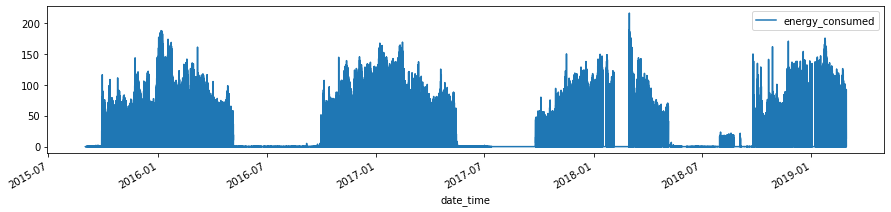

In [7]:
co_data.plot(x="date_time", y=["energy_consumed"], figsize=(15, 3))
plt.show

In [46]:
# sum daily
co_daily = co_data.groupby(co_data['date_time'].dt.date, as_index=True).agg(energy_consumed=('energy_consumed', 'sum'))
co_daily.reset_index(inplace=True)
co_daily

,date_time,energy_consumed
0,2015-09-01,2.197
1,2015-09-02,6.132
2,2015-09-03,10.354
3,2015-09-04,10.588
4,2015-09-05,15.408
...,...,...
1272,2019-02-24,48136.519
1273,2019-02-25,45960.521
1274,2019-02-26,42481.040
1275,2019-02-27,40007.587


<function matplotlib.pyplot.show(close=None, block=None)>

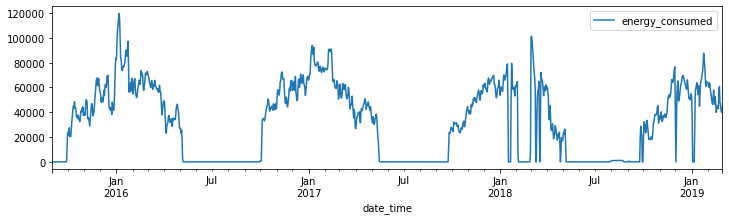

In [56]:
co_daily.plot(x="date_time", y=["energy_consumed"], figsize=(12, 3))
plt.show

### Fill missing values from 2018

In [108]:
co_daily['date_time'] = pd.to_datetime(co_daily['date_time'], format='%Y.%m.%d %H:%M:%S')
co_daily

,date_time,energy_consumed
0,2015-09-01,2.197
1,2015-09-02,6.132
2,2015-09-03,10.354
3,2015-09-04,10.588
4,2015-09-05,15.408
...,...,...
1272,2019-02-24,48136.519
1273,2019-02-25,45960.521
1274,2019-02-26,42481.040
1275,2019-02-27,40007.587


In [59]:
# Zastąp
# Sprawdź wartości z lutego w innych latach
co_for_replacement = co_daily[['date_time', 'energy_consumed']][(co_daily['date_time'].dt.year != 2018)
                                                    & (co_daily['date_time'].dt.day != 29)] #dzień przestępny z innych lat
#(co_daily['date_time'].dt.month == 2)
print(co_for_replacement.to_string())


      date_time  energy_consumed
0    2015-09-01            2.197
1    2015-09-02            6.132
2    2015-09-03           10.354
3    2015-09-04           10.588
4    2015-09-05           15.408
5    2015-09-06           13.332
6    2015-09-07           11.459
7    2015-09-08           13.706
8    2015-09-09           12.111
9    2015-09-10           12.392
10   2015-09-11           23.359
11   2015-09-12           18.745
12   2015-09-13           17.565
13   2015-09-14           15.287
14   2015-09-15           11.079
15   2015-09-16           13.839
16   2015-09-17            3.422
17   2015-09-18           11.050
18   2015-09-19           21.820
19   2015-09-20           29.214
20   2015-09-21           49.839
21   2015-09-22           34.179
22   2015-09-23           18.419
23   2015-09-24           11.114
24   2015-09-25           10.004
25   2015-09-26            9.137
26   2015-09-27            8.353
27   2015-09-28          693.321
29   2015-09-30        23842.885
30   2015-

In [60]:
# zagreguj jako rok 2018
co_for_replacement['date_time'] = co_for_replacement['date_time'].apply(lambda dt: dt.replace(year=2018))
co_for_replacement = co_for_replacement.groupby('date_time', as_index=False).agg(energy_consumed=('energy_consumed', 'mean'))
co_for_replacement

,date_time,energy_consumed
0,2018-01-01,67184.166333
1,2018-01-02,67019.040667
2,2018-01-03,58961.013333
3,2018-01-04,60121.579000
4,2018-01-05,65725.911000
...,...,...
349,2018-12-26,49830.616000
350,2018-12-27,52904.905333
351,2018-12-28,57185.283667
352,2018-12-30,70990.293667


In [125]:
# merge column with new values in co_agg
co_daily_adj = co_daily.copy()
co_daily_adj = co_daily_adj.merge(co_for_replacement[['date_time', 'energy_consumed']],on='date_time',how="left")

#Let's have a look at feb 2018 data (new values vs old, missing values)
x = co_daily_adj[:][(co_daily_adj['date_time'].dt.year == 2018)]
print(x.to_string())


# Replace missing values for Feb 2018

co_daily_adj['energy_consumed_x'] = np.where((co_daily_adj['energy_consumed_x'] == 0) & (co_daily_adj['energy_consumed_y'].notnull()), co_daily_adj['energy_consumed_y'], co_daily_adj['energy_consumed_x'])
co_daily_adj.drop(["energy_consumed_y"], inplace=True, axis=1)
co_daily_adj.rename(columns={'energy_consumed_x':'energy_consumed'},inplace=True)




      date_time  energy_consumed_x  energy_consumed_y
853  2018-01-01          53706.440       67184.166333
854  2018-01-02          59193.624       67019.040667
855  2018-01-03          60298.895       58961.013333
856  2018-01-04          59136.739       60121.579000
857  2018-01-05          56782.206       65725.911000
858  2018-01-06          56790.614       69128.350333
859  2018-01-07          64214.620       77586.265333
860  2018-01-08          69992.985       83046.513000
861  2018-01-09          68007.846       76804.763000
862  2018-01-10          65808.801       76798.244667
863  2018-01-11          67345.881       77168.198667
864  2018-01-12          69210.731       71548.656000
865  2018-01-13          73160.739       69568.588667
866  2018-01-14          76812.516       72011.503000
867  2018-01-15          78895.133       71236.842667
868  2018-01-16          43602.086       66990.474667
869  2018-01-17              0.000       71101.527667
870  2018-01-18             

In [104]:
# We can see only 0 were replaced with mean values from other years
x = co_daily_adj[:][(co_daily_adj['date_time'].dt.year == 2018)]
print(x.to_string())

      date_time  energy_consumed
853  2018-01-01     53706.440000
854  2018-01-02     59193.624000
855  2018-01-03     60298.895000
856  2018-01-04     59136.739000
857  2018-01-05     56782.206000
858  2018-01-06     56790.614000
859  2018-01-07     64214.620000
860  2018-01-08     69992.985000
861  2018-01-09     68007.846000
862  2018-01-10     65808.801000
863  2018-01-11     67345.881000
864  2018-01-12     69210.731000
865  2018-01-13     73160.739000
866  2018-01-14     76812.516000
867  2018-01-15     78895.133000
868  2018-01-16     43602.086000
869  2018-01-17     71101.527667
870  2018-01-18     76099.609667
871  2018-01-19     78681.842000
872  2018-01-20     76063.071000
873  2018-01-21     76223.009000
874  2018-01-22     49951.399000
875  2018-01-23     79340.132000
876  2018-01-24     67787.747000
877  2018-01-25     58524.051000
878  2018-01-26     59004.177000
879  2018-01-27     60078.964000
880  2018-01-28     57964.961000
881  2018-01-29     53114.504000
882  2018-

<function matplotlib.pyplot.show(close=None, block=None)>

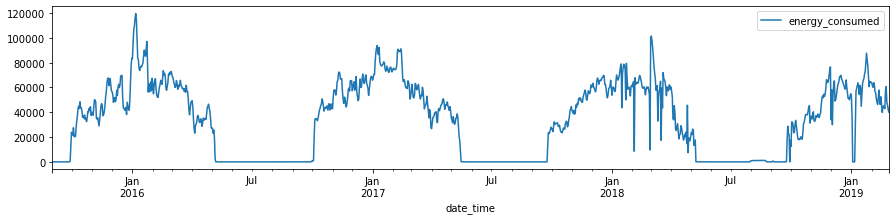

In [126]:
co_daily_adj.plot(x="date_time", y=["energy_consumed"], figsize=(15, 3))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

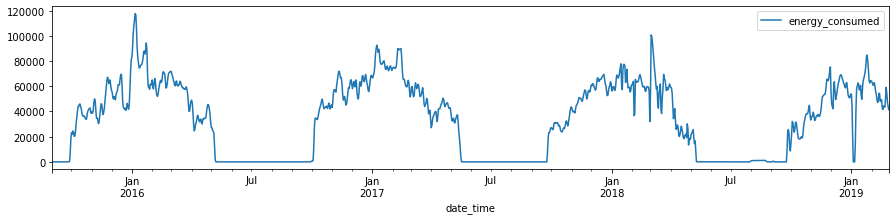

In [148]:
#rolling mean last 2 days
co_daily_adj_mean = co_daily_adj.copy()
co_daily_adj_mean["energy_consumed"] = co_daily_adj_mean['energy_consumed'].rolling(window=2).mean()
co_daily_adj_mean.dropna(inplace=True)
co_daily_adj_mean.plot(x="date_time", y=["energy_consumed"], figsize=(15, 3))
plt.show

In [128]:
# https://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/
co_daily_adj

,date_time,energy_consumed
0,2015-09-01,2.197
1,2015-09-02,6.132
2,2015-09-03,10.354
3,2015-09-04,10.588
4,2015-09-05,15.408
...,...,...
1272,2019-02-24,48136.519
1273,2019-02-25,45960.521
1274,2019-02-26,42481.040
1275,2019-02-27,40007.587


C:\Users\User\AppData\Local\Temp/ipykernel_2568/827284896.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(co_daily_adj_mean.energy_consumed, freq=364)


<Figure size 432x288 with 0 Axes>

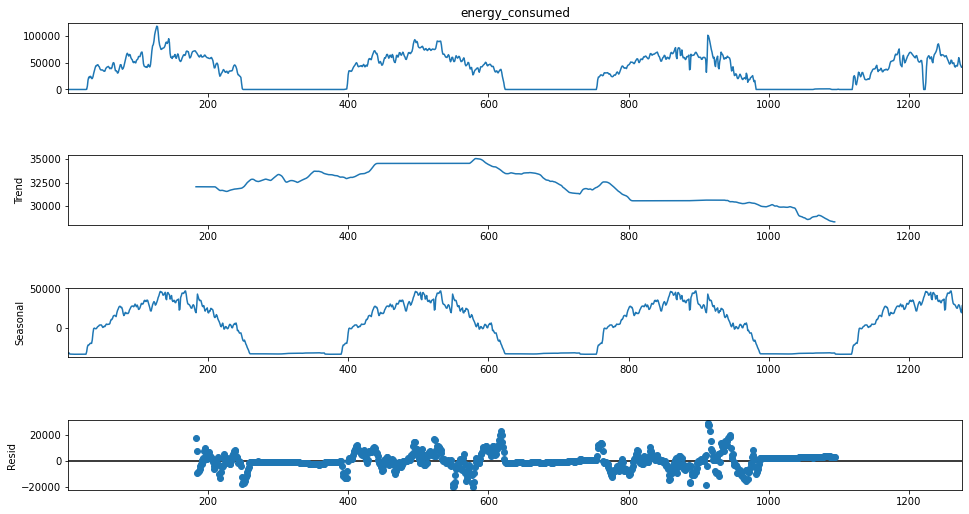

In [130]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(co_daily_adj_mean.energy_consumed, freq=364)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [82]:
# just note how to access each part
trend = decomposition.trend
seasonal = decomposition.seasonal 
residual = decomposition.resid
seasonal

0      -31190.593368
1      -31164.660654
2      -31140.819169
3      -32536.039223
4      -32585.937664
            ...     
1272    27960.475502
1273    21500.084306
1274    26596.258924
1275    12341.882978
1276    44251.687464
Name: seasonal, Length: 1277, dtype: float64

In [138]:
# For testing stationarity
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
                
    rolmean = timeseries.rolling(window=364).mean()
    rolstd = timeseries.rolling(window=364).std() # pd.rolling_std(timeseries, window=364)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

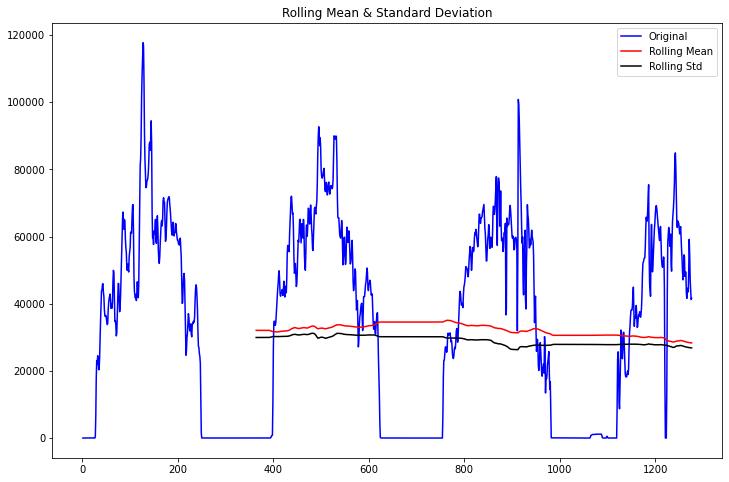

Results of Dickey-Fuller Test:
Test Statistic                   -2.529570
p-value                           0.108444
#Lags Used                       23.000000
Number of Observations Used    1252.000000
Critical Value (1%)              -3.435584
Critical Value (5%)              -2.863851
Critical Value (10%)             -2.568001
dtype: float64


In [149]:
test_stationarity(co_daily_adj_mean['energy_consumed'])

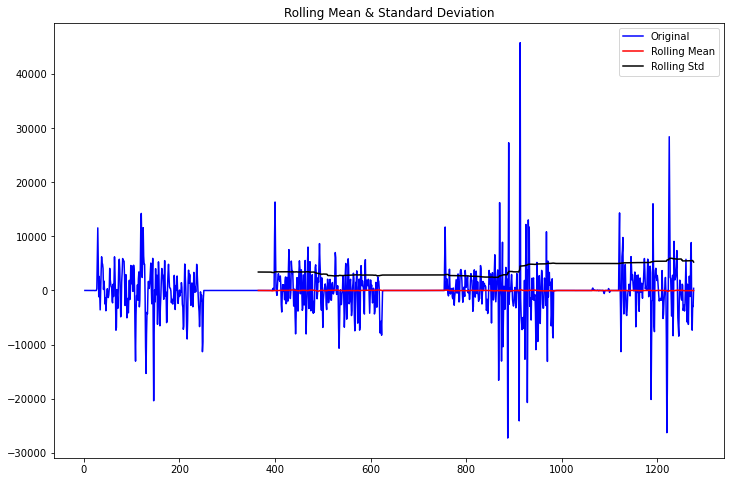

Results of Dickey-Fuller Test:
Test Statistic                -7.785659e+00
p-value                        8.193150e-12
#Lags Used                     2.300000e+01
Number of Observations Used    1.251000e+03
Critical Value (1%)           -3.435588e+00
Critical Value (5%)           -2.863853e+00
Critical Value (10%)          -2.568002e+00
dtype: float64


In [150]:
# The first thing we want to do is take a first difference of the data. 
#This should help to eliminate the overall trend from the data.

co_daily_adj_mean['first_difference'] = co_daily_adj_mean.energy_consumed - co_daily_adj_mean.energy_consumed.shift(1)
test_stationarity(co_daily_adj_mean['first_difference'].dropna(inplace=False))

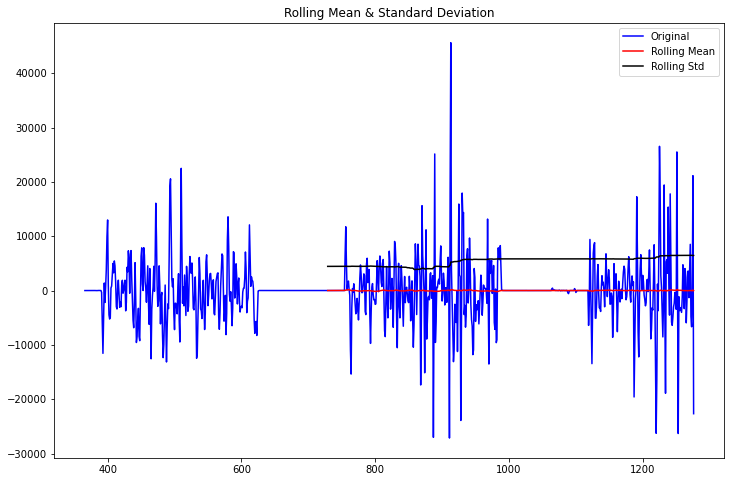

Results of Dickey-Fuller Test:
Test Statistic                -1.044129e+01
p-value                        1.519618e-18
#Lags Used                     2.100000e+01
Number of Observations Used    8.890000e+02
Critical Value (1%)           -3.437727e+00
Critical Value (5%)           -2.864797e+00
Critical Value (10%)          -2.568504e+00
dtype: float64


In [151]:
co_daily_adj_mean['seasonal_first_difference'] = co_daily_adj_mean.first_difference - co_daily_adj_mean.first_difference.shift(364)
test_stationarity(co_daily_adj_mean['seasonal_first_difference'].dropna(inplace=False))

AttributeError: module 'statsmodels.graphics' has no attribute 'tsa'

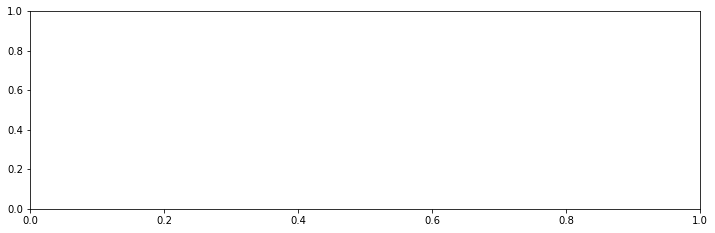

In [153]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = statsmodels.graphics.tsa.plot_acf(co_daily_adj_mean.seasonal_first_difference.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = statsmodels.graphics.tsa.plot_pacf(co_daily_adj_mean.seasonal_first_difference.iloc[13:], lags=40, ax=ax2)

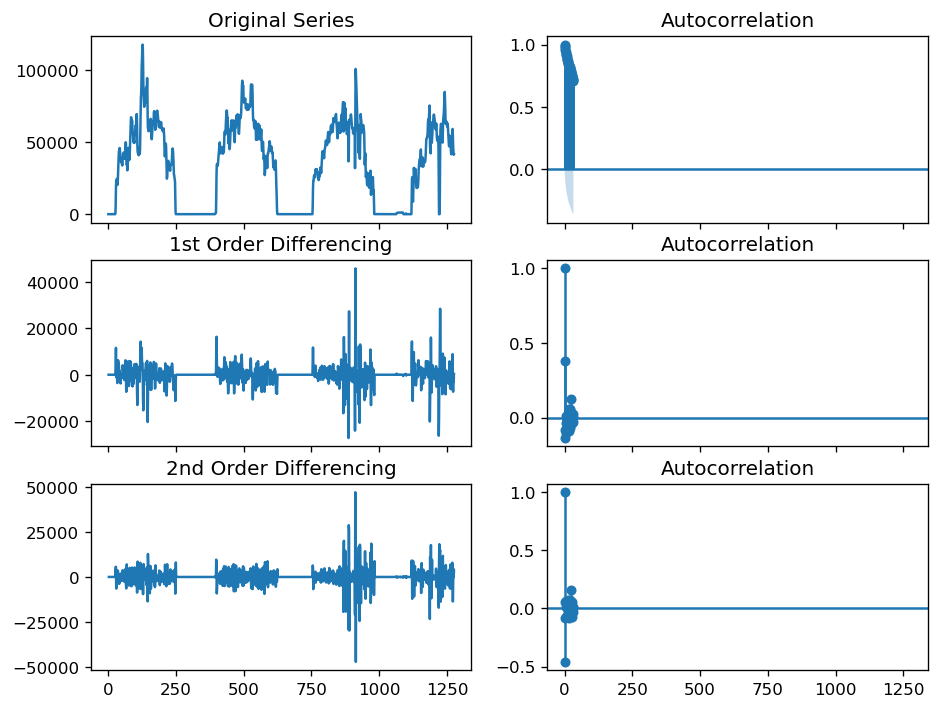

In [154]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
# df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(co_daily_adj_mean['energy_consumed'][:]); axes[0, 0].set_title('Original Series')
plot_acf(co_daily_adj_mean['energy_consumed'][:], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(co_daily_adj_mean['energy_consumed'][:].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(co_daily_adj_mean['energy_consumed'][:].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(co_daily_adj_mean['energy_consumed'][:].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(co_daily_adj_mean['energy_consumed'][:].diff().diff().dropna(), ax=axes[2, 1])

plt.show()
